In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv("C:\\Users\\DELL\\Downloads\\UpdatedResumeDataSet.csv")

In [9]:
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [11]:
df.shape

(962, 2)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [15]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [17]:
df["Category"].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

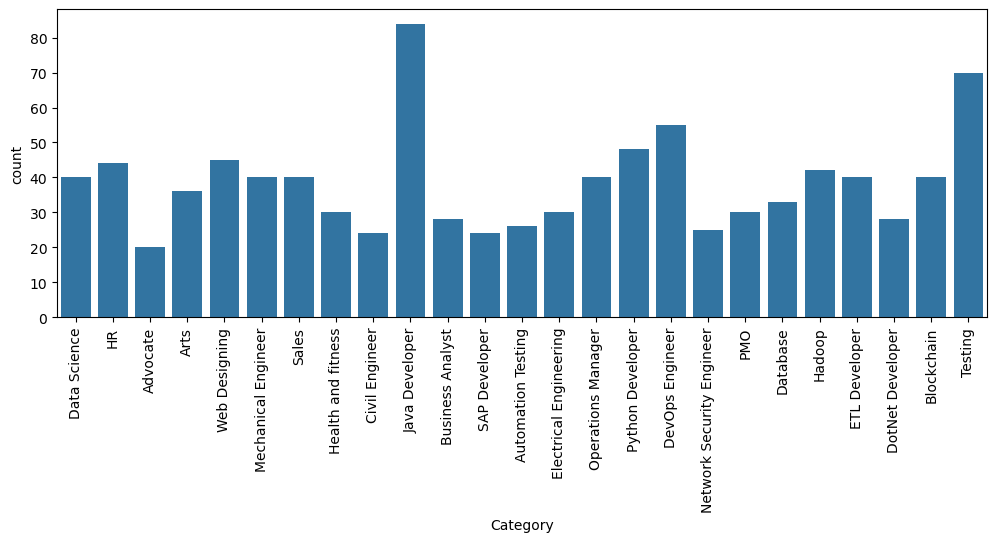

In [23]:
plt.figure(figsize=(12,4))
ax=sns.countplot(data=df,x="Category")
plt.xticks(rotation=90)
plt.show()


# # Data Preprocessing 



In [19]:
df["Resume"][5]

"SKILLS C Basics, IOT, Python, MATLAB, Data Science, Machine Learning, HTML, Microsoft Word, Microsoft Excel, Microsoft Powerpoint. RECOGNITION Academic Secured First place in B.Tech.Education Details \r\nAugust 2014 to May 2018 B.Tech.  Ghatkesar, Andhra Pradesh Aurora's Scientific and Technological Institute\r\nJune 2012 to May 2014  Secondary Education Warangal, Telangana SR Junior College\r\nData Science \r\n\r\n\r\nSkill Details \r\nMS OFFICE- Exprience - Less than 1 year months\r\nC- Exprience - Less than 1 year months\r\nmachine learning- Exprience - Less than 1 year months\r\ndata science- Exprience - Less than 1 year months\r\nMatlab- Exprience - Less than 1 year monthsCompany Details \r\ncompany - \r\ndescription - "

In [32]:
#remove url 
import re
import nltk
from nltk.corpus import stopwords
import string

# Download stopwords if not done already
nltk.download('stopwords')

def clean_resume(text):
     
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text :
        if i.isalnum():
            y.append(i)
#stop words and punctation 
    text=y[:]
    y.clear()
    for i in text :
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
#stemming
    text=y[:]
    y.clear()
    for i in text :
        y.append(ps.stem(i))
    return " ".join(y) 
    

    return clean_txt
    


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem("running")

'run'

In [38]:
df["Resume"]=df["Resume"].apply(clean_resume)

In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Category"]=le.fit_transform(df["Category"])

In [44]:
d

,Category,Resume
0,6,skill program languag python panda numpi scipi...
1,6,educ detail may 2013 may 2017 data scientist d...
2,6,area interest deep learn control system design...
3,6,skill r python sap hana tableau sap hana sql s...
4,6,educ detail mca ymcaust faridabad haryana data...


## Vectorization

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
X=tf.fit_transform(df["Resume"])

<962x5230 sparse matrix of type '<class 'numpy.float64'>'
	with 144716 stored elements in Compressed Sparse Row format>

In [53]:
y=df["Category"]

In [55]:
y

0       6
1       6
2       6
3       6
4       6
       ..
957    23
958    23
959    23
960    23
961    23
Name: Category, Length: 962, dtype: int32

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.20)

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [73]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test,y_pred))


0.9792746113989638


In [ ]:
import pickle 
pickle.dump(tf,open("tfidf.pkl","wb"))
pickle.dump(knn,open("knn.pkl","wb"))